**Introduction**

We are analyzing which neighborhood is (subjectively) "best" by our own metric. This project was completed by individually choosing our datasets and writing our own code; when that was done, we came together to think of a metric that could be applied to all three datasets.

**Metric: The Healthiest Neighborhood**

Our metric for the best neighborhood is measuring which neighborhood is the "healthiest". There are many types of health and we chose to look at a neighborhood's: financial health, security health, and respiratory health. More specifically we looked at data of a neighborhood's tax deliquency, police arrests, and air quality to determine the healthiest neighborhood.

-------------------------------------------------------------------------------------------------------

**Submetric: Tax Delinquency**

My metric is tax delinquency. I am only looking at current tax deliquency. I am using a dataset for tax deliquency. 
I looked through all the neighborhoods, and have graphs of both average deliquency per house in the neighborhood, and total deliquency. I have included a total graph to show what "most" neighborhoods look like. Every neighborhood in the first two graphs is a pretty good choice, but Homewood North is particularly good, as it has a low average and has a decent amount of total entries.

**Result**

I don't know any neighborhoods in Pittsburgh unfortunately. I have not seen any tax data from elsewhere either, so I don't know how (un)usual this data is.

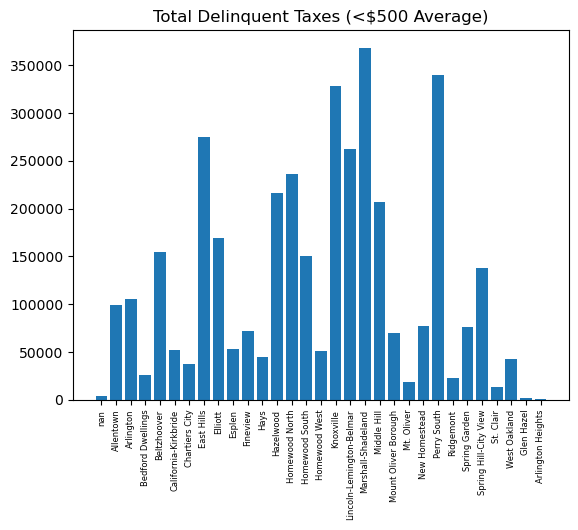

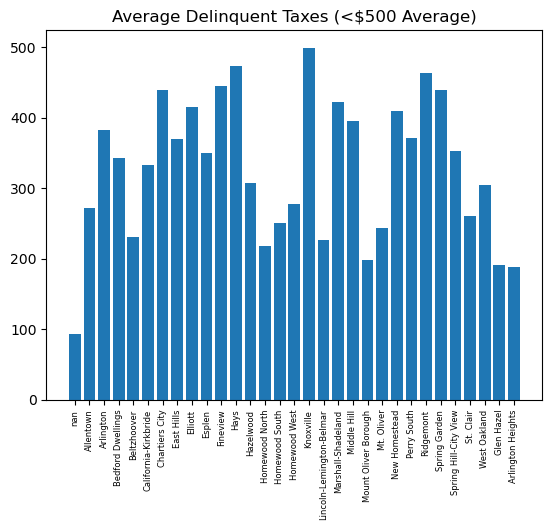

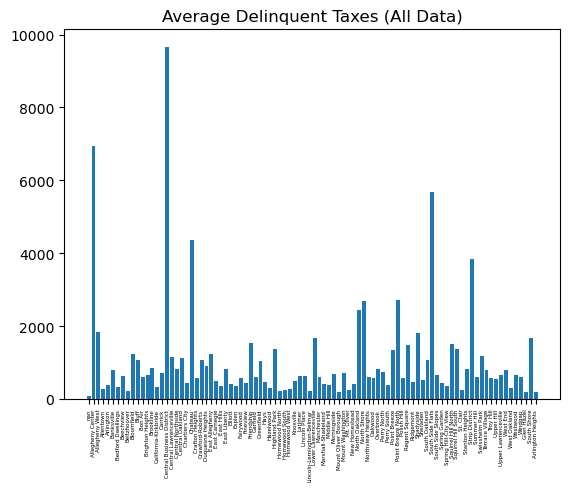

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

taxes = pd.read_csv("tax-deliquency.tsv", sep="\t")

data = {}
#stored as name: [total deliquency, number of entries]

for i in range(len(taxes)):
    current_nh = str(taxes["neighborhood"][i])
    current_tax = float(taxes["current_delq_tax"][i])
    
    if current_nh in data:
        data[current_nh][0]+=current_tax
        data[current_nh][1]+=1
    else:
        data[current_nh]=[current_tax, 1]

nh_names = list(data.keys())
nh_taxes = data.values()

nh_total_taxes = []
nh_avg_taxes = []

for total, count in nh_taxes:
    nh_total_taxes.append(total)
    nh_avg_taxes.append(total/count)

#only show lower values (<500 avg)
nh_names1,nh_total_taxes1,nh_avg_taxes1=[],[],[]
for i in range(len(nh_names)):
    if(nh_avg_taxes[i]<500):
        nh_names1.append(nh_names[i])
        nh_total_taxes1.append(nh_total_taxes[i])
        nh_avg_taxes1.append(nh_avg_taxes[i])


plt.figure()
plt.xticks(fontsize=6)
plt.bar(nh_names1, nh_total_taxes1)
plt.title("Total Delinquent Taxes (<$500 Average)")
plt.xticks(rotation=90)

plt.figure()
plt.xticks(fontsize=6)
plt.bar(nh_names1, nh_avg_taxes1)
plt.title("Average Delinquent Taxes (<$500 Average)")
plt.xticks(rotation=90)

plt.figure()
plt.xticks(fontsize=4)
plt.bar(nh_names,nh_avg_taxes)
plt.title("Average Delinquent Taxes (All Data)")
plt.xticks(rotation=90)

plt.show()

---------------------------------------------------------------------------------------------------------------------

**Submetric: Pittsburgh Police Arrests (2024-2025)**

This is dataset of all arrest information by Pittsburgh Police from the start of 2024 through 2025 October 31st. While this dataset contains a lot of information, here we are only looking at the number of arrests recorded per neighborhood. A neighborhood with a low amount of arrests is a safe neighborhood, meaning that it is high in security health.

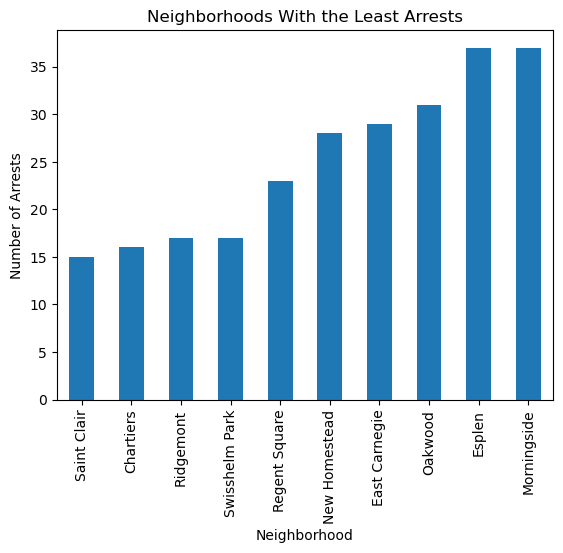

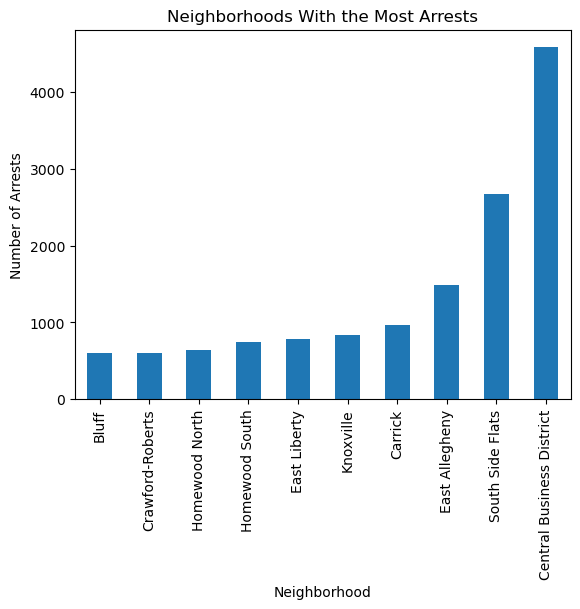

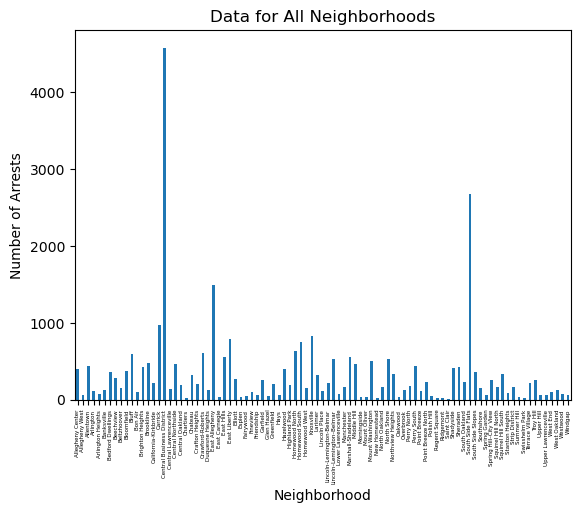

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('pgh-arrests-data.csv', sep=",")
nhdata = data.groupby('Neighborhood').count()
nhall = nhdata['Violation']
nht10 = nhall.sort_values(ascending=True).head(10)
nhb10 = nhall.sort_values(ascending=True).tail(10)

plt.ylabel("Number of Arrests")
plt.title("Neighborhoods With the Least Arrests")
nht10.plot.bar()
plt.show()

plt.ylabel("Number of Arrests")
plt.title("Neighborhoods With the Most Arrests")
nhb10.plot.bar()
plt.show()

plt.xticks(fontsize=4)
plt.ylabel("Number of Arrests")
plt.title("Data for All Neighborhoods")
nhall.plot.bar()
plt.show()

**Result**

Saint Clair is the healthiest neighborhood by this metric because it has had the least arrests with only 15.

------------------------------------------------------------------------------------------------------------------

**Submetric: Air Quality**

Air quality is positively correlated with general health. It is an important factor when deciding where to live. In all cases it should be a factor in deciding the best neighborhood to live in.

**Data**

This is a dataset of daily air quality of the neighborhoods in pittsburgh. Air quality is measured on an index value. The lower the value, the higher the air quality. 

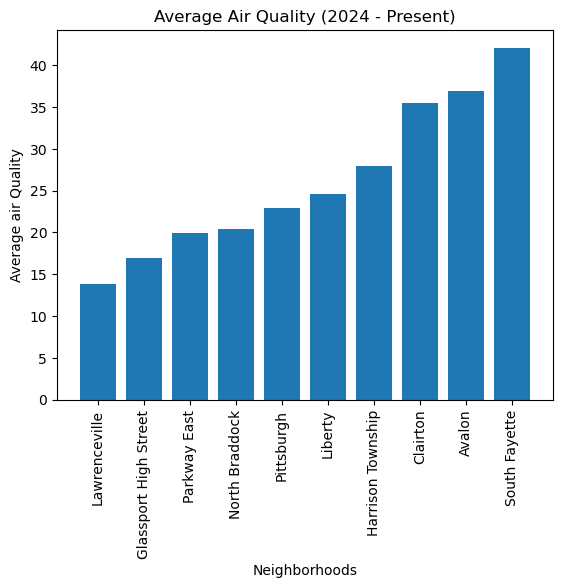

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import re

#Obtaining data from the dataset
air = pd.read_csv("Air_Quality.csv")

air['date'] = pd.to_datetime(air['date'])

# Combining neighborhoods with identical names
def clean_name(name):
    return re.sub(r'\s*\d+$','',str(name)).strip()
air['clean_name'] = air['site'].apply(clean_name)

#Pulling data from 2024 onwards
air_2024 = air[air['date'].dt.year >= 2024]

#Averaging air quality
average_nb_air = air_2024.groupby('clean_name')['index_value'].mean().sort_values()

#Plotting the data
plt.bar(average_nb_air.index, average_nb_air.values)
plt.xticks(rotation = 90)
plt.xlabel('Neighborhoods')
plt.ylabel('Average air Quality')
plt.title('Average Air Quality (2024 - Present)')
plt.show()

**Result**

The graph shows the neighborhoods selected in the dataset. It demonstrates the average air quality of the neighborhoods from 2024 onward. As shown on the graph, Lawrenceville has the lowest average index, indicating the highest average air quality. The neighborhood with the highest average index was South Fayette, indicating the worst average air quality.

**Conclusion**

While it is not represented in our air quality submetric, the Saint Clair neighborhood has the least the number of arrests and is among the best in tax deliquency. Therefore, Saint Clair is the best neighborhood because it is healthiest neighborhood by our metrics.